In [2]:
import pandas as pd
import numpy as np

## Задание 1

### Исследование данных датафрейма dfTutorialCompleted

In [3]:
dfTutorialCompleted = pd.read_csv('hw_lesson02_tutorial_completed.csv')
dfTutorialCompleted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59857 entries, 0 to 59856
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       59857 non-null  object
 1   event_name    59857 non-null  object
 2   event_dt      59857 non-null  object
 3   duration_sec  59857 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [4]:
dfTutorialCompleted.head(10)

,user_id,event_name,event_dt,duration_sec
0,--0-b0cbb8-a,tutorial_completed,2020-06-08 13:46:07,951
1,--014ca35_b7,tutorial_completed,2020-05-09 04:20:13,1143
2,--0424774bcb,tutorial_completed,2020-05-30 07:23:05,3758
3,--043682a1ad,tutorial_completed,2020-05-15 03:14:40,1326
4,--05-26b0-6b,tutorial_completed,2020-05-20 13:07:08,2828
5,--08-9-27837,tutorial_completed,2020-04-04 16:55:32,1241
6,--0879c8c638,tutorial_completed,2020-06-22 07:53:02,768
7,--1-abff208-,tutorial_completed,2020-05-17 22:54:55,1869
8,--13_f829805,tutorial_completed,2020-05-09 16:25:56,1267
9,--158fa03d_f,tutorial_completed,2020-04-24 13:48:53,3061


In [5]:
import datetime as dt

In [6]:
a = pd.Timestamp(np.max(dfTutorialCompleted['event_dt']))
a

Timestamp('2020-06-30 23:54:40')

In [7]:
b = pd.Timestamp(np.min(dfTutorialCompleted['event_dt']))
b

Timestamp('2020-04-01 00:04:01')

In [8]:
delt = a - b
display(f"разница: {delt}")

'разница: 90 days 23:50:39'

Данные покрывают временной интервал с апреля по июнь 2020-го года. 

### Исследование данных датафрейма dfLessonSessions

In [9]:
dfLessonSessions = pd.read_excel('hw_lesson02_sessions.xlsx')
dfLessonSessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167890 entries, 0 to 167889
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           167890 non-null  object        
 1   region            167890 non-null  object        
 2   device            167890 non-null  object        
 3   channel           167890 non-null  object        
 4   session_duration  167890 non-null  float64       
 5   session_start     167890 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.7+ MB


In [10]:
dfLessonSessions.head(10)

,user_id,region,device,channel,session_duration,session_start
0,d35ad20dd45d,SEA,iPhone,GameAds,2589.186227,2020-04-01 17:51:25
1,ac4a113c52c_,CIS,iPhone,GameAds,1467.539334,2020-04-01 09:39:33
2,d0337d117cc8,CIS,iPhone,GameAds,3777.737508,2020-04-01 01:19:56
3,2f8c_262-_85,North America,iPhone,GameAds,3755.966201,2020-04-01 11:21:54
4,4b1-114-4692,Europe,iPhone,GameAds,2898.802314,2020-04-01 18:29:57
5,3-978101_f0d,North America,iPhone,GameAds,2086.907960,2020-04-01 23:39:28
6,b845_77f5c61,North America,iPhone,SenseAds,5313.214652,2020-04-01 10:53:58
7,6519-_24604d,North America,iPhone,GameAds,2075.250965,2020-04-01 02:35:28
8,76a8df88-b31,SEA,iPhone,GameAds,1597.009074,2020-04-01 04:01:28
9,d475bca_0f4b,Europe,iPhone,SenseAds,2769.343087,2020-04-01 11:20:34


In [11]:
dfLessonSessions["region"].value_counts()

region
CN               33116
North America    28260
CIS              26187
Europe           23413
South America    19962
Africa           15049
SEA              12356
Australia         9547
Name: count, dtype: int64

Таким образом, больше всего учебные сессии проходят люди из Китая, Северной Америки и СНГ, меньше всего - из Австралии, Центральной Азии и Африки.

In [12]:
dfLessonSessions["device"].value_counts()

device
Andoroid    116186
iPhone       51704
Name: count, dtype: int64

Подавляющее большинство пользователей проходит учебные сессии с андроидов.

In [13]:
a = np.max(dfLessonSessions['session_start'])
display(f"максимальная дата прохождения: {a.strftime("%Y-%m-%d %H:%M:%S")}")

'максимальная дата прохождения: 2020-06-30 23:59:45'

In [14]:
b = np.min(dfLessonSessions['session_start'])
display(f"минимальная дата прохождения: {b.strftime("%Y-%m-%d %H:%M:%S")}")

'минимальная дата прохождения: 2020-04-01 00:00:23'

In [15]:
delt = a - b
display(f"разница: {delt}")

'разница: 90 days 23:59:22'

Данные покрывают временной интервал с апреля по июнь 2020-го года. 

## Задание 2

### session_duration

рассчитать для каждой из колонок среднее, среднеквадратическое отклонение, медиану;

In [16]:
import math
sd = dfLessonSessions['session_duration'].to_numpy()
sd.sort()
sd[:10]

array([0.00022829, 0.02763725, 0.03419351, 0.03998066, 0.0421889 ,
       0.06222895, 0.06296996, 0.06864051, 0.07055025, 0.08000759])

##### среднее

In [17]:
sd_mean=np.mean(sd)
sd_mean

np.float64(1807.9227331896218)

##### среднеквадратическое отклонение

In [18]:
sd_std=np.std(sd)
sd_std

np.float64(1807.8405742686416)

##### медиана

In [19]:
np.median(sd)

np.float64(1250.3175364674275)

##### среднее в минутах

In [20]:
round(np.mean(sd) / 60)

30

##### медиана в минутах

In [21]:
round(np.median(sd) / 60)

21

In [22]:
import matplotlib.pyplot as plt

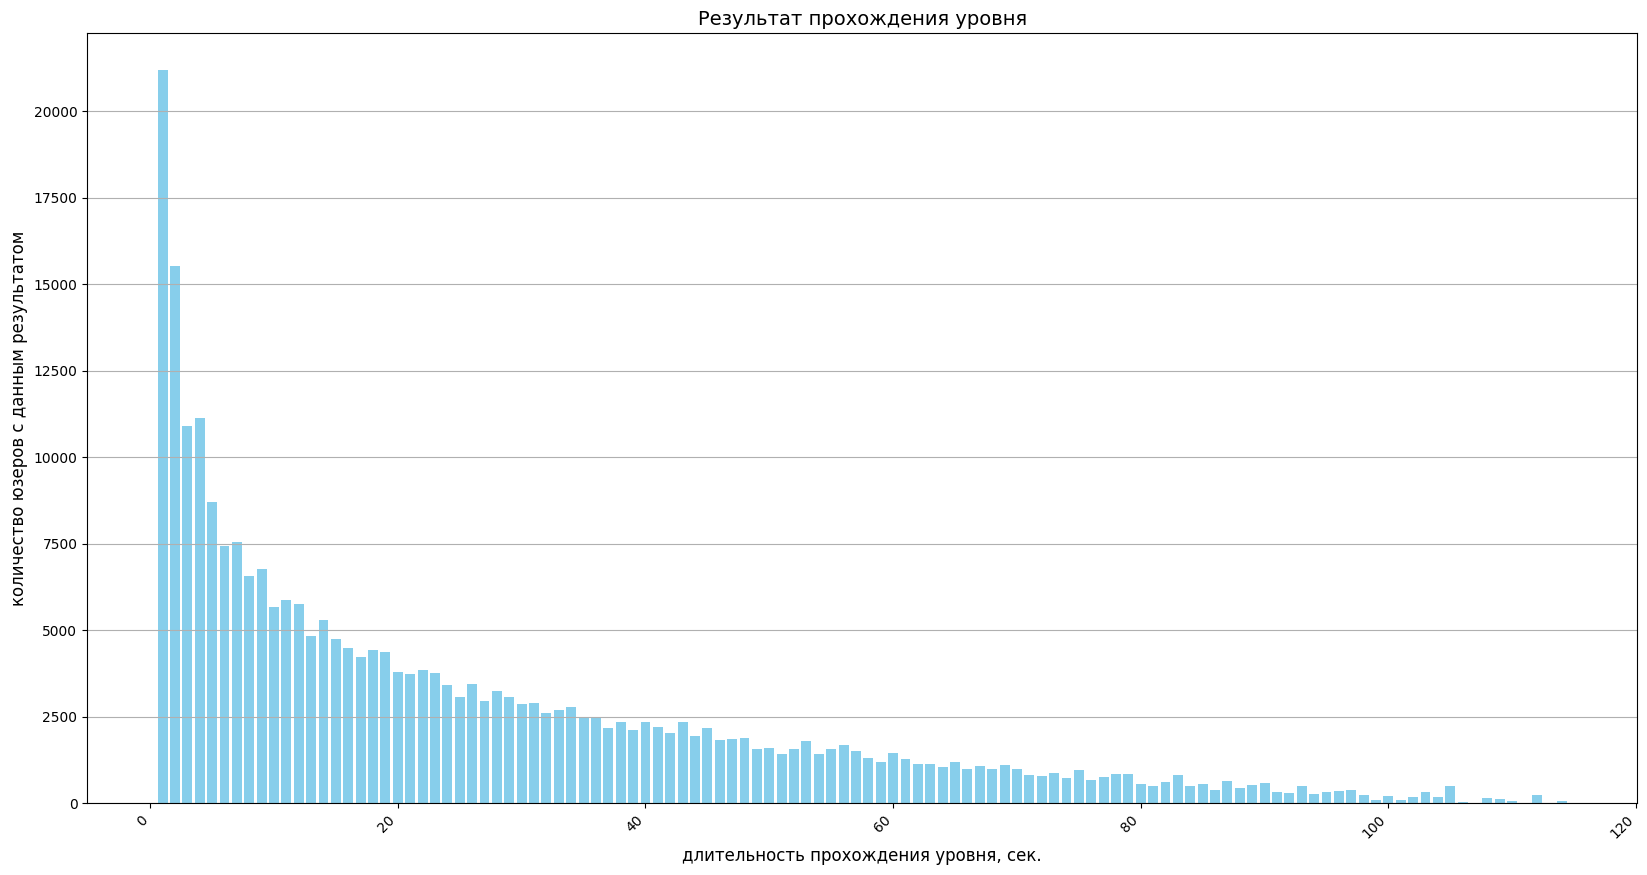

In [23]:

sum_sd = dfLessonSessions['session_duration'].apply(np.ceil).value_counts().reset_index()
sum_sd.columns = ['количество юзеров с данным результатом', 'длительность прохождения уровня']

plt.figure(figsize=(20, 10))
plt.bar(sum_sd['длительность прохождения уровня'], sum_sd['количество юзеров с данным результатом'], color='skyblue')
plt.title('Результат прохождения уровня', fontsize=14)
plt.ylabel('количество юзеров с данным результатом',  fontsize=12)
plt.xlabel('длительность прохождения уровня, сек.', fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

Проанализировав график, можно прпдположить, что подаёвляющее большинство пользователей пропускают прохождение учебного уровня и переходят сразу к основной игре.

### duration_sec

In [24]:
ds = dfTutorialCompleted['duration_sec'].to_numpy()
ds.sort()
ds[:10]

array([30, 41, 51, 51, 56, 63, 64, 72, 74, 77])

##### среднее

In [25]:
ds_mean=np.mean(ds)
ds_mean

np.float64(2696.541356900613)

##### среднеквадратическое отклонение

In [26]:
ds_std=np.std(ds)
ds_std

np.float64(1631.8130921936402)

##### медиана

In [27]:
np.median(ds)

np.float64(2398.0)

##### среднее в минутах

In [28]:
round(np.mean(ds) / 60)

45

##### медиана в минутах

In [29]:
round(np.median(ds) / 60)

40

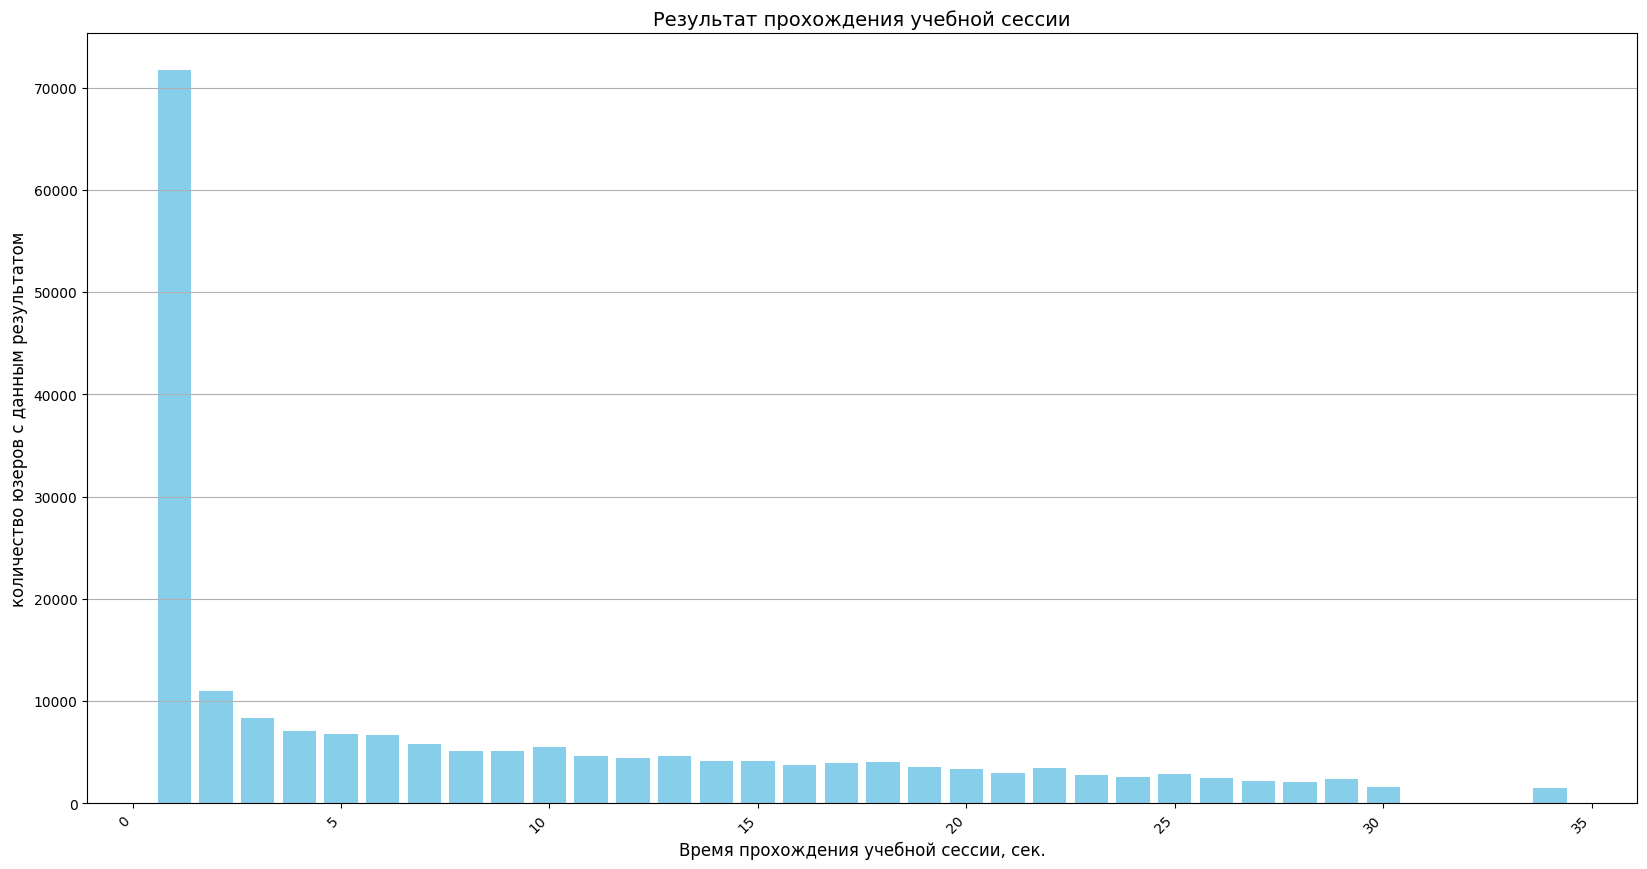

In [30]:
sum_ds = dfTutorialCompleted['duration_sec'].value_counts().reset_index()
sum_ds.columns=['количество юзеров с данным результатом', 'длительность прохождения учебной сессии']

plt.figure(figsize=(20, 10))
plt.bar(sum_ds['длительность прохождения учебной сессии'], sum_ds['количество юзеров с данным результатом'], color='skyblue')
plt.title('Результат прохождения учебной сессии', fontsize=14)
plt.ylabel('количество юзеров с данным результатом',  fontsize=12)
plt.xlabel('Время прохождения учебной сессии, сек.', fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')
plt.grid(axis='y')
# plt.tight_layout()
plt.show()


Получили распределение с положительной ассиметрией. Можно сделать вывод, что подавляющее большинство пользователей пропускают учебную сессию, вследствие чего, проходят ее меньше, чем за 5 секунд.

## Задание 3

### duration_sec

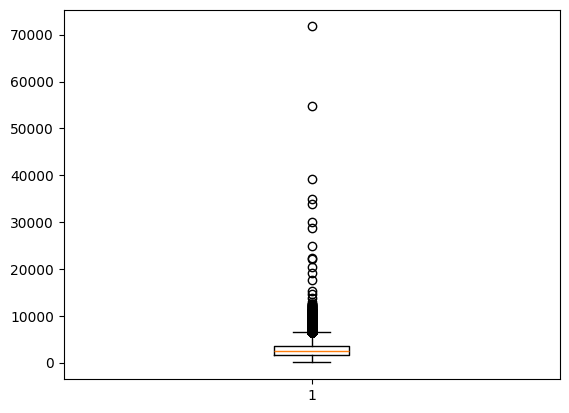

In [31]:
plt.boxplot(x=dfTutorialCompleted['duration_sec'])
plt.show()

In [32]:
np.percentile(dfTutorialCompleted['duration_sec'], 0.99)

np.float64(382.57439999999997)

Таким образом, 99% пользователей прошли уровень меньше, чем за 383 секунды.

### session_duration

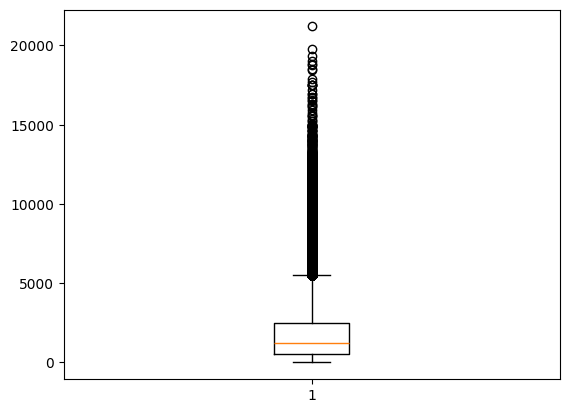

In [33]:
plt.boxplot(x=dfLessonSessions['session_duration'])
plt.show()

In [34]:
np.percentile(dfLessonSessions['session_duration'], 0.99)

np.float64(17.51709017894105)

Таким образом, 99% процентов игроков прошли уровень меньше, чем за 18 секунд. Можно заметить большое количество выбросов в этом массиве даных, поэтому необходимо их проанализировать.

## Задание 4


### Фильтрация ошибок и сохранение файла

### duration_sec

In [35]:
ds_lb = ds_mean - 3 * ds_mean
ds_ub = ds_std + 3 * ds_std
dfTC_no_blowout=dfTutorialCompleted.query(f"(duration_sec >= {ds_lb}) & (duration_sec <= {ds_ub})")
dfTC_no_blowout.to_csv("dfTC_no_blowout.csv")

### session_duration

In [36]:
sd_lb = sd_mean - 3 * sd_mean
sd_ub = sd_std + 3 * sd_std
dfLS_no_blowout=dfLessonSessions.query(f"(session_duration >= {sd_lb}) & (session_duration <= {sd_ub})")
dfLS_no_blowout.to_csv("dfLS_no_blowout.csv")

## Задание 5

In [38]:
def filter_outliers(df, column, q):
    newDf=df.query(f"{column} <= {np.quantile(df[column], q)}")
    return newDf